<a href="https://colab.research.google.com/github/carolinehagood/covid-project/blob/main/Final_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cross-correlation function (CCF)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('merged_data.csv')
df.tail()

,Start_Date,End_Date,Year,Week,COVID-19 Deaths,Total_Doses,Doses_Cumulative
152,2022-11-27,2022-12-03,2022,48.0,2599.0,2267466.0,659920383.0
153,2022-12-04,2022-12-10,2022,49.0,3042.0,2228895.0,662149278.0
154,2022-12-11,2022-12-17,2022,50.0,3194.0,2110617.0,664259895.0
155,2022-12-18,2022-12-24,2022,51.0,3325.0,1479730.0,665739625.0
156,2022-12-25,2022-12-31,2022,52.0,3668.0,1212616.0,666952241.0


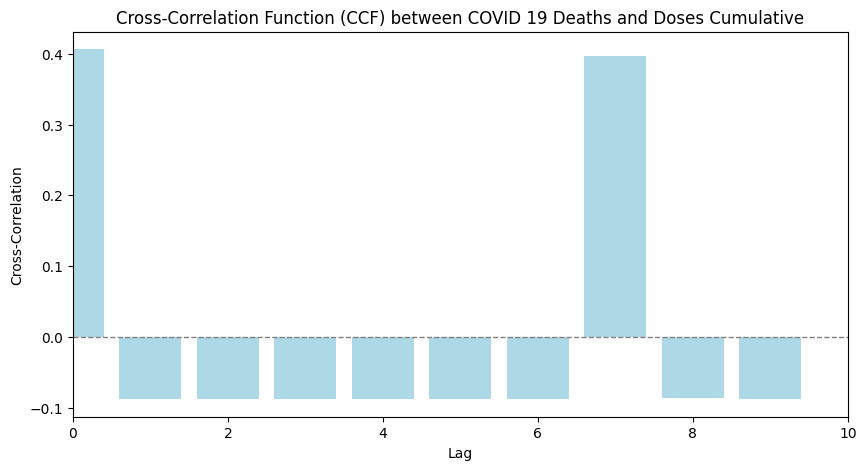

In [19]:
from datetime import date
from statsmodels.tsa.stattools import ccf

# Convert 'start date' and 'end date' columns to datetime format
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'])

# Create a date range for the analysis, expanding it from start to end dates
date_range = pd.date_range(start=df['Start_Date'].min(), end=df['End_Date'].max(), freq='D')
# Create a new DataFrame to aggregate COVID 19 Deaths and Doses Cumulative over the date range
agg_data = pd.DataFrame(index=date_range)

# Aggregate the values for each date (you may need to adjust the aggregation method as needed)
agg_data['COVID-19 Deaths'] = df.set_index('Start_Date').resample('D')['COVID-19 Deaths'].sum()
agg_data['Doses_Cumulative'] = df.set_index('Start_Date').resample('D')['Doses_Cumulative'].sum()

# Fill any missing values with 0 (or another appropriate method)
agg_data.fillna(0, inplace=True)

# Calculate CCF
max_lag = 10  # Define the maximum lag
cross_corr = ccf(agg_data['COVID-19 Deaths'], agg_data['Doses_Cumulative'], adjusted=False)

# Plotting the CCF
plt.figure(figsize=(10, 5))
plt.bar(range(max_lag), cross_corr[:max_lag], color='lightblue')
plt.title('Cross-Correlation Function (CCF) between COVID 19 Deaths and Doses Cumulative')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(0, max_lag)
plt.show()



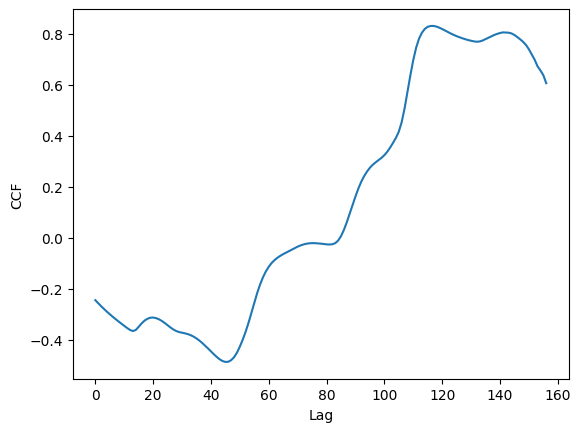

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# Calculate the cross-correlation function (CCF)
ccf_result = ccf(df['COVID-19 Deaths'], df['Doses_Cumulative'])

# Plot the CCF
plt.plot(ccf_result)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.show()

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient and p-value
x = df['Doses_Cumulative']
y = df['COVID-19 Deaths']
corr_coefficient, p_value = pearsonr(x, y)

print(f"Pearson's correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")


Pearson's correlation coefficient: -0.24491531444789186
P-value: 0.001991613272597461


In [7]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

#Calculating Granger Causality
x = df['Total_Doses']
y = df['COVID-19 Deaths']
data = pd.DataFrame({'x': x, 'y': y})

max_lag = 5
grangercausalitytests(data, max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.6485  , p=0.0187  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=5.7592  , p=0.0164  , df=1
likelihood ratio test: chi2=5.6555  , p=0.0174  , df=1
parameter F test:         F=5.6485  , p=0.0187  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8986  , p=0.0582  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=5.9905  , p=0.0500  , df=2
likelihood ratio test: chi2=5.8777  , p=0.0529  , df=2
parameter F test:         F=2.8986  , p=0.0582  , df_denom=150, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3143  , p=0.0218  , df_denom=147, df_num=3
ssr based chi2 test:   chi2=10.4165 , p=0.0153  , df=3
likelihood ratio test: chi2=10.0793 , p=0.0179  , df=3
parameter F test:         F=3.3143  , p=0.0218  , df_denom=147, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4748  , p=0.0470  

{1: ({'ssr_ftest': (5.6484592024030125, 0.018707540725972402, 153.0, 1),
   'ssr_chi2test': (5.759213304410914, 0.016402414243085955, 1),
   'lrtest': (5.655450006995125, 0.017401208908516097, 1),
   'params_ftest': (5.648459202403039, 0.018707540725972256, 153.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.898642239181002, 0.05819064220830057, 150.0, 2),
   'ssr_chi2test': (5.9905272943074035, 0.0500234368111398, 2),
   'lrtest': (5.877663496207788, 0.05292752531614417, 2),
   'params_ftest': (2.898642239181097, 0.058190642208295146, 150.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.3143373058773697, 0.021751934706087328, 147.0, 3),
   'ssr_chi2test': (10.41648867561459, 0.015338236487121624, 3),
   'lrtest': (10.07932637396516, 0.01790372895142397, 3),
   'params_ftest': (3.314337305882072, 0.02175193470595556, 147.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.,